#### Variables
**Starting**<br>
salary		： Original Dataset, Replace '?' to 'NaN'<br>
new_salary	: Remove Missing Values<br>
new_salary1	: Remove Outliers<br>

**Split data**<br>
X_train, X_test, y_train, y_test<br>
X_train_num<br>
X_train_cat <br>
X_train_num_tr : Standardize (numeric)<br>
X_train_tr      : Finalize Test Set<br>
X_test_tr      : Finalize Test Set<br>
X_train_cat_1 ~ 8 <br>
X_test_cat_1 ~ 8 

# Salary Prediction

## Import Python Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Data Collection

In [4]:
#salary = pd.read_csv('SalaryBackup.csv')
salary = pd.read_csv("Salary.csv", na_values = "?")

In [5]:
salary.head(10)

,work_type,age,weight,education,education_years,marital_status,occupation,relationship,race,sex,investment_gain,investment_loss,company_size,weekly_hours,country,salary_range
0,Private,19,216804,7th-8th,4.0,Never-married,Other-service,Own-child,White,Male,0,0,825,33,United-States,low
1,Private,23,207546,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,865,40,United-States,low
2,Private,41,253759,HS-grad,9.0,Never-married,Sales,Unmarried,Black,Female,0,0,727,40,United-States,low
3,Private,28,180928,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,5013,0,328,55,United-States,low
4,Private,17,208463,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0,0,977,20,United-States,low
5,Private,73,333676,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,118,50,United-States,low
6,Local-gov,65,24824,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,793,40,United-States,low
7,Private,37,96330,Some-college,10.0,Never-married,Exec-managerial,Unmarried,Black,Female,0,0,193,40,United-States,low
8,Private,53,47396,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,427,40,United-States,low
9,NaN,61,166855,Bachelors,13.0,Married-civ-spouse,NaN,Husband,White,Male,0,0,164,10,United-States,low


In [6]:
salary.isnull().sum()

work_type          1836
age                   0
weight                0
education             0
education_years       9
marital_status        0
occupation         1843
relationship          0
race                  0
sex                   0
investment_gain       0
investment_loss       0
company_size          0
weekly_hours          0
country             583
salary_range          0
dtype: int64

In [7]:
#original shape of dataset
print("Shape",salary.shape)

Shape (32561, 16)


In [8]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   work_type        30725 non-null  object 
 1   age              32561 non-null  int64  
 2   weight           32561 non-null  int64  
 3   education        32561 non-null  object 
 4   education_years  32552 non-null  float64
 5   marital_status   32561 non-null  object 
 6   occupation       30718 non-null  object 
 7   relationship     32561 non-null  object 
 8   race             32561 non-null  object 
 9   sex              32561 non-null  object 
 10  investment_gain  32561 non-null  int64  
 11  investment_loss  32561 non-null  int64  
 12  company_size     32561 non-null  int64  
 13  weekly_hours     32561 non-null  int64  
 14  country          31978 non-null  object 
 15  salary_range     32561 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 4.0+ MB


In [9]:
salary.groupby('salary_range').size()

salary_range
high     7841
low     24720
dtype: int64

*Comment for the size of "salary_range":*<br>
- Maybe need to rebalance the class **(avoid imbalanced class result)**

## Numerical vs Categorical Data

In [15]:
sal_num = salary.select_dtypes(include=['float64','int64'])
sal_num.head()

,age,weight,education_years,investment_gain,investment_loss,company_size,weekly_hours
0,19,216804,4.0,0,0,825,33
1,23,207546,7.0,0,0,865,40
2,41,253759,9.0,0,0,727,40
3,28,180928,10.0,5013,0,328,55
4,17,208463,9.0,0,0,977,20


In [16]:
sal_cat = salary.select_dtypes(include=['object'])
sal_cat.head()

,work_type,education,marital_status,occupation,relationship,race,sex,country,salary_range
0,Private,7th-8th,Never-married,Other-service,Own-child,White,Male,United-States,low
1,Private,11th,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,low
2,Private,HS-grad,Never-married,Sales,Unmarried,Black,Female,United-States,low
3,Private,Some-college,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States,low
4,Private,HS-grad,Never-married,Sales,Own-child,White,Female,United-States,low


## Numerical Features Analysis

In [11]:
salary.describe() 

,age,weight,education_years,investment_gain,investment_loss,company_size,weekly_hours
count,32561.000000,3.256100e+04,32552.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080609,1077.648844,87.303830,500.930838,40.437456
std,13.640433,1.055500e+05,2.572762,7385.292085,402.960219,285.784842,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,5.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,254.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,502.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,745.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,1000.000000,99.000000


Summary of the describtion of the data:
---
1. Age   : 17 - 90 years old
2. Weight: 1.376900e+04 - 1.484705e+06
3. Education_years: 1 - 16 years
4. investment_gain: 0.00 - 99999.00
5. investment_loss: 0.00 - 4356.00
6. company_size   : 5 - 1000 employees
7. weekly_hours   : 1 - 99 hours

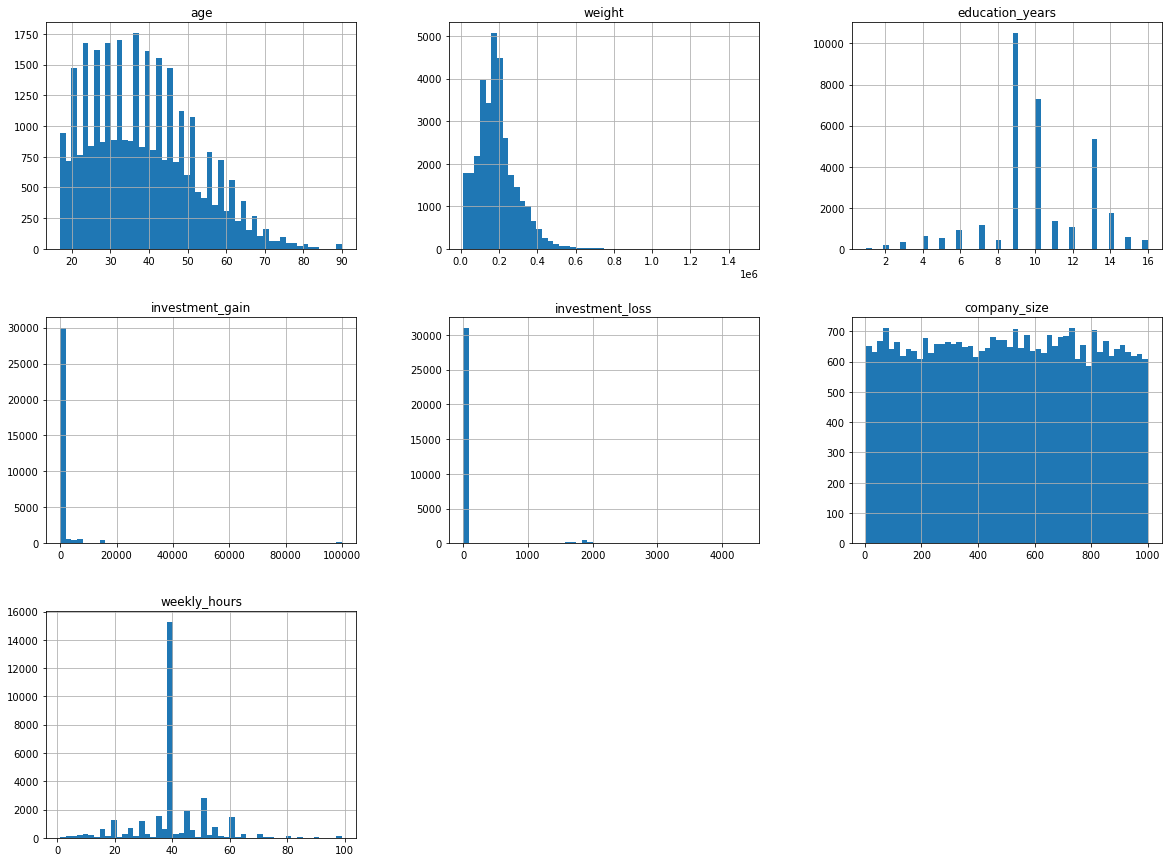

In [12]:
salary.hist(bins = 50, figsize = (20,15))
plt.show() 

Distribution data questions: <br>
    a. How is the distribution data - heavy tail issue<br>
        - 3 attributes (weight, investment_gain, investment_loss)<br>
    b. What is peculiar about the graph<br>
        - <br>
    c. Features that have different scales<br>
        - weekly_hours

## Categorical Features Analysis

In [17]:
def discat(col):
    print(col.value_counts(), '\n')
    
for i in sal_cat:
    discat(salary[i])

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: work_type, dtype: int64 

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64 

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64 

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales             

Formulate data question of the: <br>
    a. How many possible values for the categorical feature<br>
        - 10 attributes<br>
    b. What is the most frequent value<br>
        - <br>
    c. What is the least frequent value<br>
        - <br>

# Data Visualization

## Correlation

In [7]:
salary.corr()

,age,weight,education_years,investment_gain,investment_loss,company_size,weekly_hours
age,1.000000,-0.076646,0.036495,0.077674,0.057775,0.002589,0.068756
weight,-0.076646,1.000000,-0.043220,0.000432,-0.010252,0.004007,-0.018768
education_years,0.036495,-0.043220,1.000000,0.122649,0.079678,-0.007389,0.148050
investment_gain,0.077674,0.000432,0.122649,1.000000,-0.031615,0.004572,0.078409
investment_loss,0.057775,-0.010252,0.079678,-0.031615,1.000000,0.003726,0.054256
company_size,0.002589,0.004007,-0.007389,0.004572,0.003726,1.000000,0.000768
weekly_hours,0.068756,-0.018768,0.148050,0.078409,0.054256,0.000768,1.000000


Text(0.5, 1.0, '- Correlation matrix and Heatmap -')

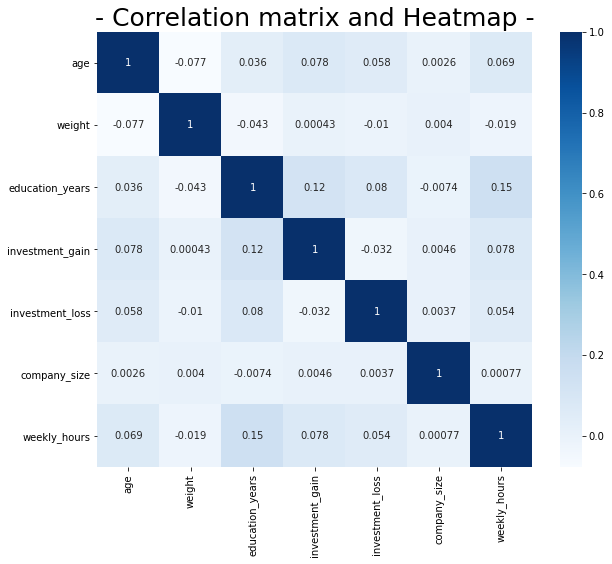

In [40]:
plt.figure(figsize =(10,8))
corrmat = salary.corr()
sb.heatmap(corrmat, square=True, annot=True, cbar=True, cmap="Blues");  #Blues
plt.title('- Correlation matrix and Heatmap -',fontsize = 25)

### Positive Correlation
- Age and Investment Gain
- Age and Investment Loss
- Weekly Hours and Age
- Weekly Hours and Education Years
- Education Years and Investment Gain
- Education Years and Investment Lost

### Negative Correlation
- Age and Weight
- Weight and Investment Lost
- Weight and Weekly Hours
- Investment Gain and Investment Loss
- Education Years and Company Size

*Observation: There are nothing much correlation between these numerical attributes

#### Relationship between investment gain and salary range between male and females

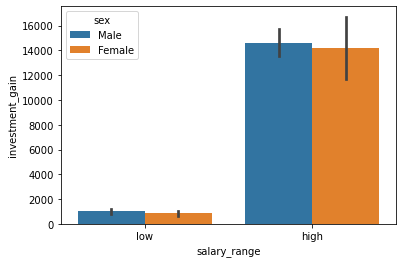

In [41]:
sb.barplot(x='salary_range',y='investment_gain',data=salary,estimator=np.std,hue='sex')

#### Relationship between years of education and salary range

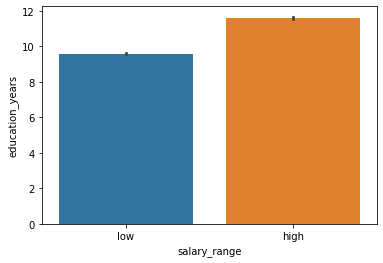

In [19]:
sb.barplot(x='salary_range',y='education_years',data=salary)

#### Relationship between weekly hours worked and salary range

<AxesSubplot:xlabel='salary_range', ylabel='weekly_hours'>

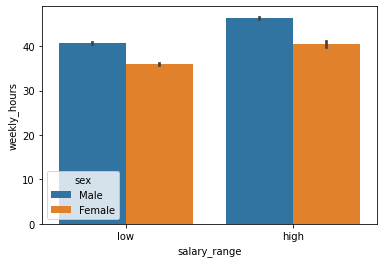

In [43]:
sb.plot(x='salary_range',y='weekly_hours',data=salary, hue='sex')

#### Relationship between age and salary range (Update in report)

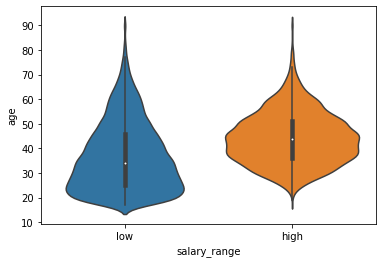

In [15]:
sb.violinplot(x='salary_range',y='age',data=salary)

#### Relationship between weekly hours and age (Update in report)

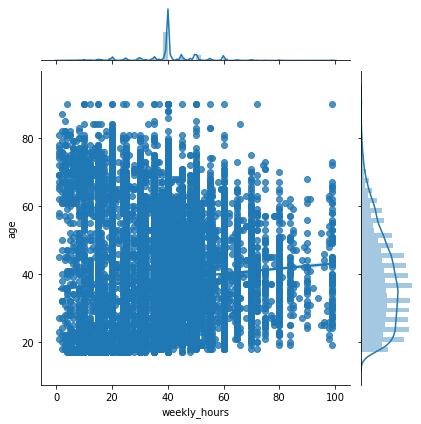

In [40]:
sb.jointplot(x='weekly_hours',y='age',data=salary, kind='reg')

#### Relationship between investment gain of people of different race

Text(0.5, 1.0, '- Investment Gain of Different Races -')

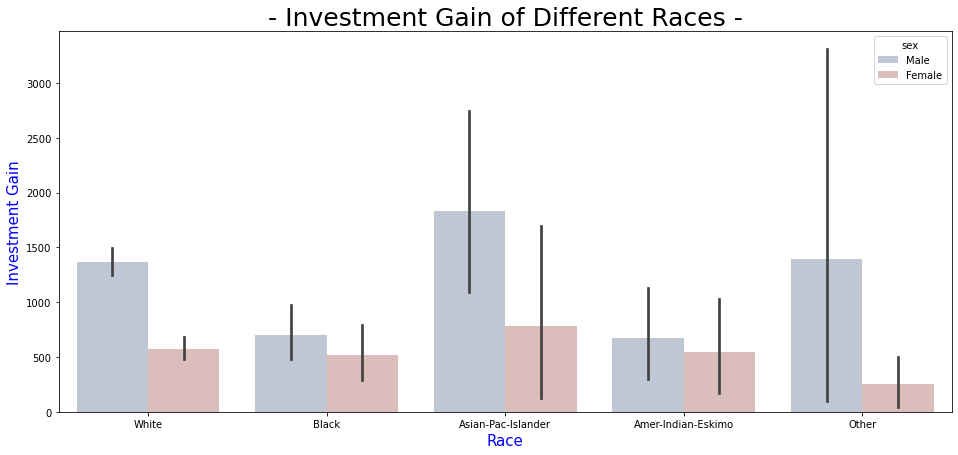

In [44]:
plt.figure(figsize =(16,7))
sb.barplot(x='race',y='investment_gain',data=salary, hue='sex',palette='vlag')

plt.xlabel('Race',fontsize = 15,color='blue')
plt.ylabel('Investment Gain',fontsize = 15,color='blue')
plt.title('- Investment Gain of Different Races -',fontsize = 25)

#### Countries with most people in low salary range

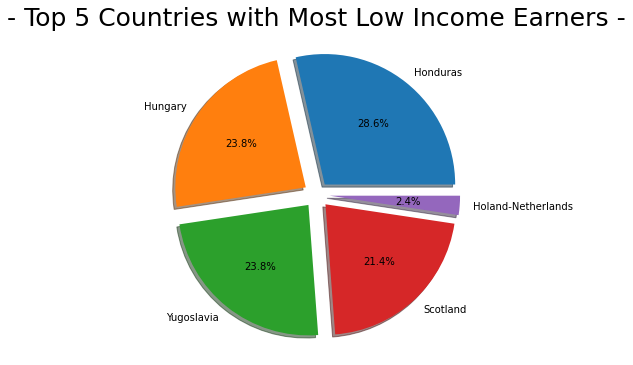

In [45]:
co = salary.groupby('salary_range')
top5 = co['country'].value_counts().tail(5)

x = top5
y = top5['low'].index.tolist()

fig, ex = plt.subplots(figsize=(10, 6))
explode = (0.1,0.1,0.1,0.1,0.1)
plt.pie(x, explode=explode,labels=y, autopct='%1.1f%%', shadow=True)
plt.title('- Top 5 Countries with Most Low Income Earners -',fontsize = 25)
plt.show()

#### Countries with most people in high salary range

Text(0.5, 1.0, '- Top 5 Countries with Most Number of High Income Earners -')

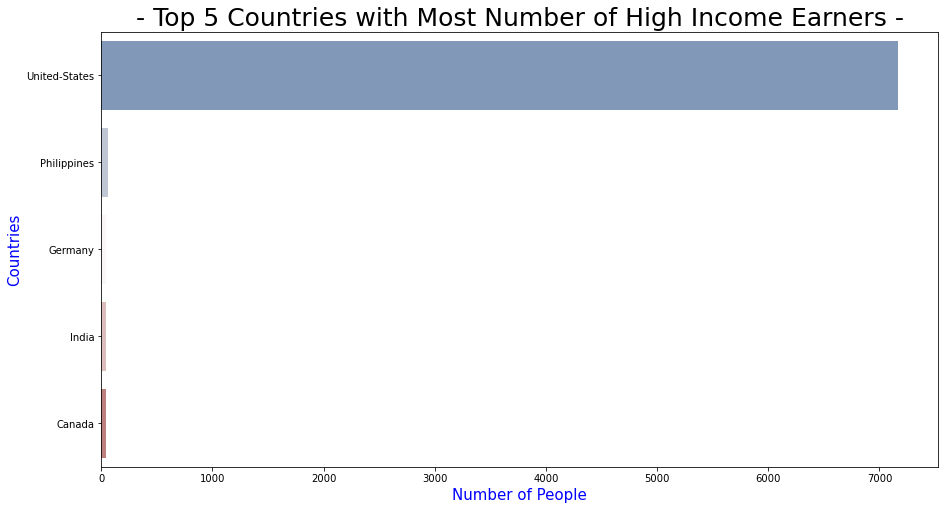

In [46]:
co = salary.groupby('salary_range')
top5 = co['country'].value_counts().head(5)

x = top5
y = top5['high'].index.tolist()

plt.figure(figsize =(15,8))
sb.barplot(x=x,y=y,data=salary,palette='vlag')

plt.xlabel('Number of People',fontsize = 15,color='blue')
plt.ylabel('Countries',fontsize = 15,color='blue')
plt.title('- Top 5 Countries with Most Number of High Income Earners -',fontsize = 25)

#### Education

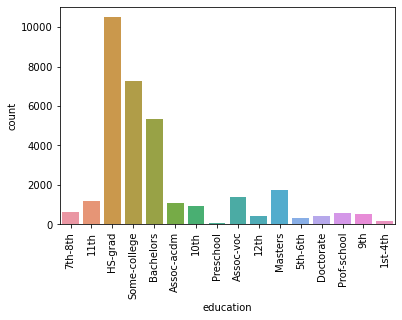

In [6]:
plot = sb.countplot(salary['education'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

#### Age of participants (Update in report)

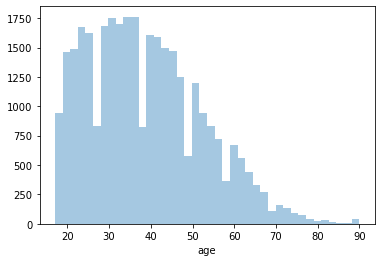

In [44]:
sb.distplot(salary['age'],kde=False,bins=40)

#### Salary Range (Target)

[Text(0, 0, 'low'), Text(0, 0, 'high')]

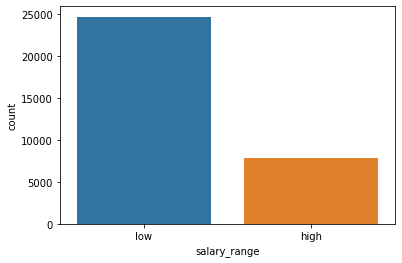

In [4]:
plot = sb.countplot(salary['salary_range'])
plot.set_xticklabels(plot.get_xticklabels())

#### Country

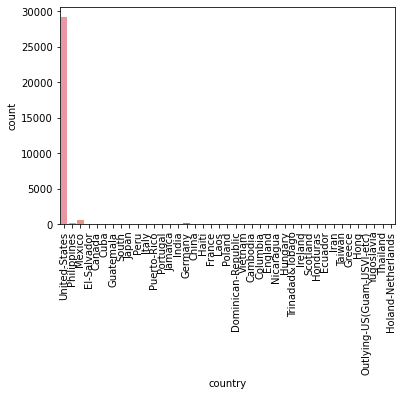

In [5]:
plot = sb.countplot(salary['country'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

#### Pair Plot

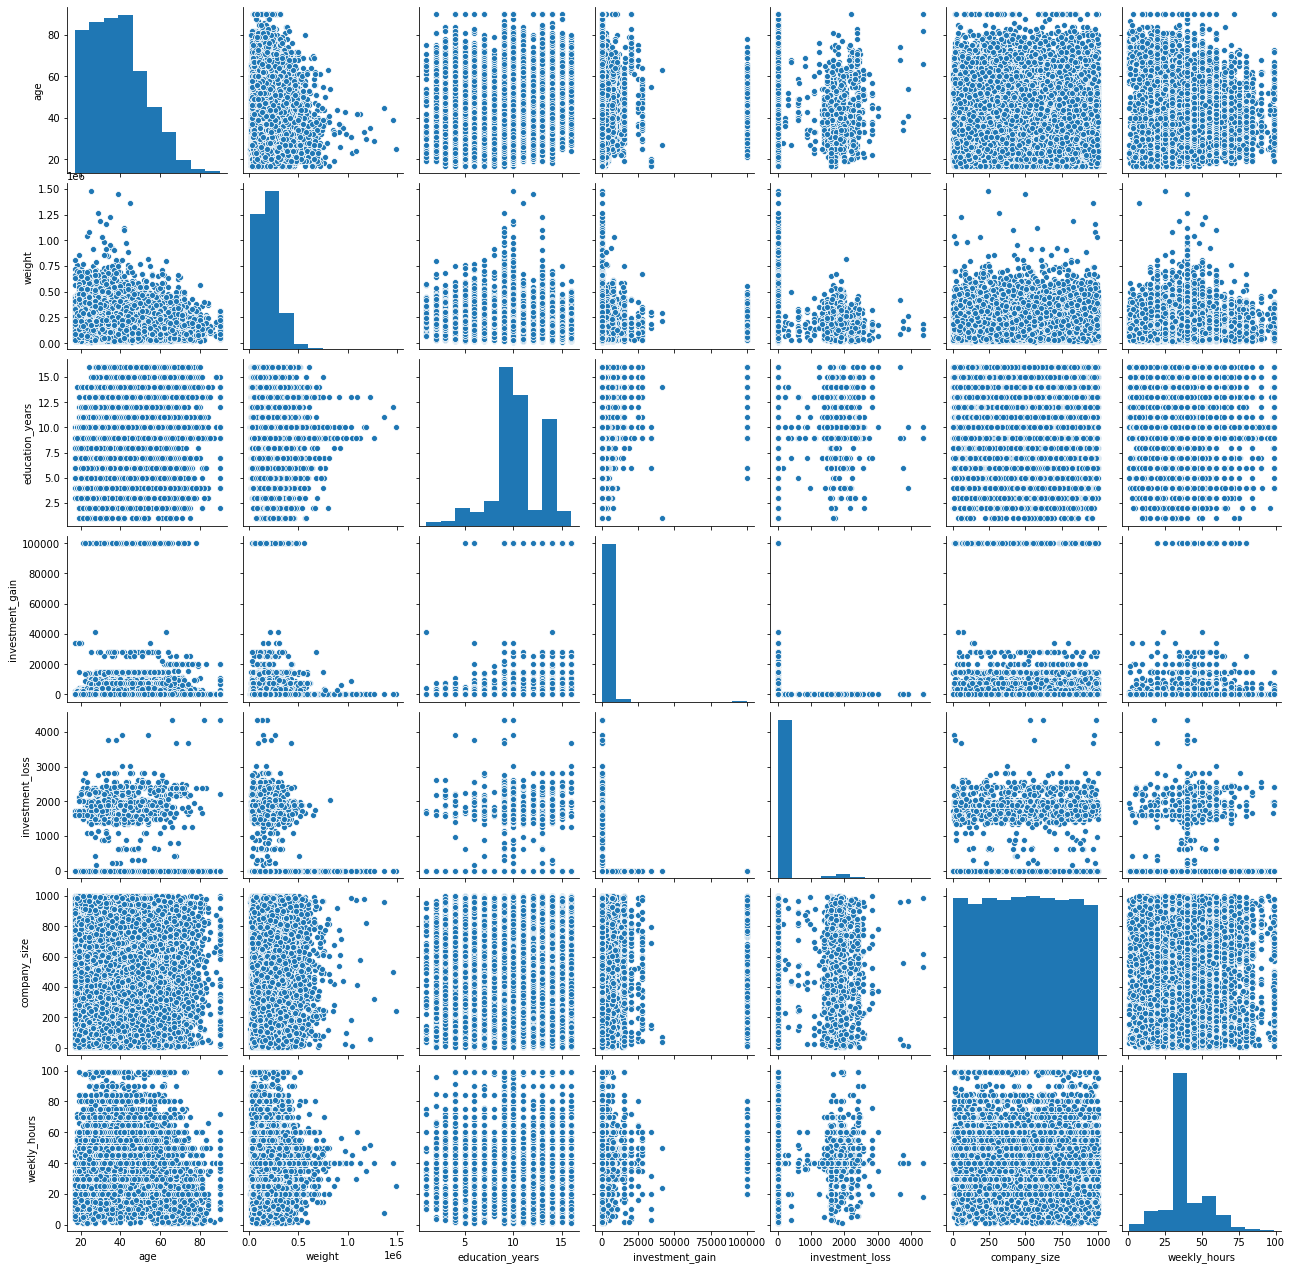

In [17]:
sb.pairplot(salary,palette='coolwarm') 

---

# Data Preprocessing

### Handle Missing Data

In [18]:
salary.isnull().sum()

work_type          1836
age                   0
weight                0
education             0
education_years       9
marital_status        0
occupation         1843
relationship          0
race                  0
sex                   0
investment_gain       0
investment_loss       0
company_size          0
weekly_hours          0
country             583
salary_range          0
dtype: int64

In [19]:
#Drop NaN value - for new_salary 
import copy
new_salary = copy.deepcopy(salary)
new_salary.dropna(inplace = True)
print('Original Attribute Shape:',salary.shape)
print('Clean Attribute Shape:',new_salary.shape)

Original Attribute Shape: (32561, 16)
Clean Attribute Shape: (30153, 16)


* Result: 32561-30153 = 2408 missing values (have been removed)

In [28]:
new_salary.isnull().sum()

work_type          0
age                0
weight             0
education          0
education_years    0
marital_status     0
occupation         0
relationship       0
race               0
sex                0
investment_gain    0
investment_loss    0
company_size       0
weekly_hours       0
country            0
salary_range       0
dtype: int64

In [20]:
new_salary.head(10)

,work_type,age,weight,education,education_years,marital_status,occupation,relationship,race,sex,investment_gain,investment_loss,company_size,weekly_hours,country,salary_range
0,Private,19,216804,7th-8th,4.0,Never-married,Other-service,Own-child,White,Male,0,0,825,33,United-States,low
1,Private,23,207546,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,865,40,United-States,low
2,Private,41,253759,HS-grad,9.0,Never-married,Sales,Unmarried,Black,Female,0,0,727,40,United-States,low
3,Private,28,180928,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,5013,0,328,55,United-States,low
4,Private,17,208463,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0,0,977,20,United-States,low
5,Private,73,333676,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,118,50,United-States,low
6,Local-gov,65,24824,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,793,40,United-States,low
7,Private,37,96330,Some-college,10.0,Never-married,Exec-managerial,Unmarried,Black,Female,0,0,193,40,United-States,low
8,Private,53,47396,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,427,40,United-States,low
10,Local-gov,30,44566,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,833,80,United-States,low


In [21]:
new_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30153 entries, 0 to 32558
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   work_type        30153 non-null  object 
 1   age              30153 non-null  int64  
 2   weight           30153 non-null  int64  
 3   education        30153 non-null  object 
 4   education_years  30153 non-null  float64
 5   marital_status   30153 non-null  object 
 6   occupation       30153 non-null  object 
 7   relationship     30153 non-null  object 
 8   race             30153 non-null  object 
 9   sex              30153 non-null  object 
 10  investment_gain  30153 non-null  int64  
 11  investment_loss  30153 non-null  int64  
 12  company_size     30153 non-null  int64  
 13  weekly_hours     30153 non-null  int64  
 14  country          30153 non-null  object 
 15  salary_range     30153 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 3.9+ MB


In [29]:
#running a loop for value_counts of each column to find out unique values. 
for c in new_salary.columns:
    print ("---- %s ---" % c)
    print (new_salary[c].value_counts())

---- work_type ---
Private             22279
Self-emp-not-inc     2498
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           942
Without-pay            14
Name: work_type, dtype: int64
---- age ---
36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
85      3
88      3
86      1
Name: age, Length: 72, dtype: int64
---- weight ---
203488    13
113364    12
148995    12
121124    12
164190    12
          ..
282972     1
252253     1
344414     1
280927     1
145522     1
Name: weight, Length: 20260, dtype: int64
---- education ---
HS-grad         9838
Some-college    6675
Bachelors       5043
Masters         1627
Assoc-voc       1306
11th            1048
Assoc-acdm      1008
10th             819
7th-8th          557
Prof-school      541
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64
---- education_years ---

---

### Remove Outlier

<AxesSubplot:>

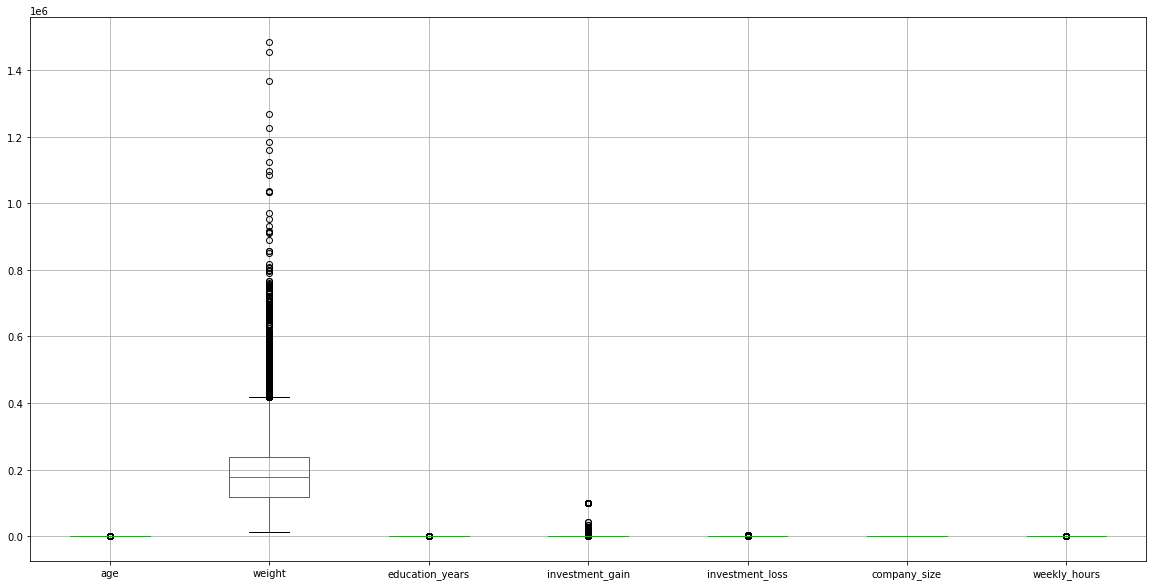

In [22]:
new_salary.boxplot(figsize=(20,10))

In [23]:
Z = (new_salary-new_salary.mean())/new_salary.std()
Z.describe()

,age,company_size,education_years,investment_gain,investment_loss,weekly_hours,weight
count,3.015300e+04,3.015300e+04,3.015300e+04,3.015300e+04,3.015300e+04,3.015300e+04,3.015300e+04
mean,-1.218326e-16,-7.536247e-17,-1.572641e-16,-2.879212e-15,1.874327e-15,-7.237271e-16,-1.126092e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.632126e+00,-1.738309e+00,-3.576911e+00,-1.474647e-01,-2.185333e-01,-3.332833e+00,-1.665962e+00
25%,-7.946425e-01,-8.629447e-01,-4.396992e-01,-1.474647e-01,-2.185333e-01,-7.762613e-02,-6.830671e-01
50%,-1.094289e-01,5.416791e-03,-4.754771e-02,-1.474647e-01,-2.185333e-01,-7.762613e-02,-1.076257e-01
75%,6.519197e-01,8.562710e-01,1.128907e+00,-1.474647e-01,-2.185333e-01,3.397081e-01,4.527480e-01
max,3.925718e+00,1.745641e+00,2.305361e+00,1.335236e+01,1.055805e+01,4.846918e+00,1.225594e+01


In [24]:
new_salary

,work_type,age,weight,education,education_years,marital_status,occupation,relationship,race,sex,investment_gain,investment_loss,company_size,weekly_hours,country,salary_range
0,Private,19,216804,7th-8th,4.0,Never-married,Other-service,Own-child,White,Male,0,0,825,33,United-States,low
1,Private,23,207546,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,865,40,United-States,low
2,Private,41,253759,HS-grad,9.0,Never-married,Sales,Unmarried,Black,Female,0,0,727,40,United-States,low
3,Private,28,180928,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,5013,0,328,55,United-States,low
4,Private,17,208463,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0,0,977,20,United-States,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,Private,52,146378,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,940,40,United-States,high
32555,Private,54,210736,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,843,40,United-States,high
32556,Self-emp-not-inc,56,84774,Assoc-acdm,12.0,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,0,544,40,United-States,low
32557,Self-emp-inc,42,50122,HS-grad,9.0,Married-civ-spouse,Sales,Husband,White,Male,0,0,596,60,United-States,low


In [25]:
new_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30153 entries, 0 to 32558
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   work_type        30153 non-null  object 
 1   age              30153 non-null  int64  
 2   weight           30153 non-null  int64  
 3   education        30153 non-null  object 
 4   education_years  30153 non-null  float64
 5   marital_status   30153 non-null  object 
 6   occupation       30153 non-null  object 
 7   relationship     30153 non-null  object 
 8   race             30153 non-null  object 
 9   sex              30153 non-null  object 
 10  investment_gain  30153 non-null  int64  
 11  investment_loss  30153 non-null  int64  
 12  company_size     30153 non-null  int64  
 13  weekly_hours     30153 non-null  int64  
 14  country          30153 non-null  object 
 15  salary_range     30153 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 3.9+ MB


In [26]:
import scipy.stats as stats
import numpy as np
print('Number of rows before discarding outliers = %d' % (new_salary.shape[0]))

#since it can be remove the numerical attributes so we have to declare it before process
num_attribute = ['age','weight','education_years','investment_gain','investment_loss','company_size','weekly_hours']
z_scores = stats.zscore(new_salary[num_attribute])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <= 3).all(axis=1)
new_salary1 = new_salary[filtered_entries]

print('Number of rows after discarding outliers = %d' % new_salary1.shape[0])

Number of rows before discarding outliers = 30153
Number of rows after discarding outliers = 27613


### Check Duplicate

In [30]:
dups = new_salary1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


*There is no any duplicate data*

---

### Separate output vector from input matrix 

In [31]:
new_salary1

,work_type,age,weight,education,education_years,marital_status,occupation,relationship,race,sex,investment_gain,investment_loss,company_size,weekly_hours,country,salary_range
0,Private,19,216804,7th-8th,4.0,Never-married,Other-service,Own-child,White,Male,0,0,825,33,United-States,low
1,Private,23,207546,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,865,40,United-States,low
2,Private,41,253759,HS-grad,9.0,Never-married,Sales,Unmarried,Black,Female,0,0,727,40,United-States,low
3,Private,28,180928,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,5013,0,328,55,United-States,low
4,Private,17,208463,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0,0,977,20,United-States,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32552,Local-gov,40,26929,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,796,40,United-States,low
32553,Private,52,146378,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,940,40,United-States,high
32555,Private,54,210736,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,843,40,United-States,high
32556,Self-emp-not-inc,56,84774,Assoc-acdm,12.0,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,0,544,40,United-States,low


In [32]:
#Drop targeted variable from the matrix X as the input matrix Y 
X = new_salary1.drop('salary_range', axis = 1)

#Convert the target attribute's value into boolean type (easy when process, since it only has "high" and "low")
new_salary1['salary_range'] = [1 if x=='high' else 0 for x in new_salary1['salary_range']]
y = new_salary1['salary_range']

<ipython-input-32-c0b1cbdd65ef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_salary1['salary_range'] = [1 if x=='high' else 0 for x in new_salary1['salary_range']]


In [33]:
#Show the shape and type class of the dataFrame for matrix X and Y
print("Shape original dataFrame", new_salary1.shape)
print("X shape",  X.shape, "type = ", type(X))
print("Y shape",  y.shape, "type = ", type(y))

Shape original dataFrame (27613, 16)
X shape (27613, 15) type =  <class 'pandas.core.frame.DataFrame'>
Y shape (27613,) type =  <class 'pandas.core.series.Series'>


### Split the Dataset - Training, Testing

In [40]:
#Load the python library - sklearn  
from sklearn.model_selection import train_test_split

#Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print('Original Dataset =', X.shape)
print('Training Dataset =', X_train.shape)
print('Testing Dataset =', X_test.shape)

Original Dataset = (27613, 15)
Training Dataset = (22090, 15)
Testing Dataset = (5523, 15)


### Split the input matrix - numerical and categorical sets

In [42]:
cat_attribute = ['work_type','education', 'marital_status', 'occupation', 'relationship','race','sex','country']
X_train_num = X_train.drop(cat_attribute, axis = 1)
X_train_cat = X_train[cat_attribute]

print(X_train_num.shape)
print(X_train_cat.shape)

(22090, 7)
(22090, 8)


### Standardize numeric data

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = False)
scaler.fit(X_train_num)       
X_train_num_tr = scaler.transform(X_train_num)

In [44]:
print('Mean:\n',X_train_num_tr.mean (axis=0))
print('\nStandard Deviation:\n',X_train_num_tr.std (axis=0))

Mean:
 [ 1.18048522e-16 -5.27519279e-17 -7.88062337e-18  4.93745179e-17
  2.57326477e-18 -3.34524421e-17 -3.69906811e-17]

Standard Deviation:
 [1. 1. 1. 1. 1. 1. 1.]


In [45]:
X_train_num_tr  #transformed into ndArray

array([[-0.00299268,  0.16173441, -0.45958199, ..., -0.03712353,
        -0.26518422,  1.81954084],
       [ 0.54142947,  0.41933834,  1.18749425, ..., -0.03712353,
        -1.69861319,  0.89248625],
       [-0.62518943,  1.65268294, -0.04781293, ..., -0.03712353,
        -1.48482549, -0.03456835],
       ...,
       [-0.85851321, -1.07365442, -0.45958199, ..., -0.03712353,
         0.4918345 ,  1.81954084],
       [ 1.94137214, -1.65814344,  1.59926331, ..., -0.03712353,
         1.12618814, -0.03456835],
       [-1.0140624 ,  0.18722895, -0.04781293, ..., -0.03712353,
         1.51170694, -0.03456835]])

### One-hot encode categorical data

In [46]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22090 entries, 7281 to 6961
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   work_type       22090 non-null  object
 1   education       22090 non-null  object
 2   marital_status  22090 non-null  object
 3   occupation      22090 non-null  object
 4   relationship    22090 non-null  object
 5   race            22090 non-null  object
 6   sex             22090 non-null  object
 7   country         22090 non-null  object
dtypes: object(8)
memory usage: 1.5+ MB


In [47]:
#Seperate each of the Categorical Attribute for One Hot Encoding
X_train_cat1=X_train_cat.work_type
X_train_cat2=X_train_cat.education
X_train_cat3=X_train_cat.marital_status
X_train_cat4=X_train_cat.occupation
X_train_cat5=X_train_cat.relationship
X_train_cat6=X_train_cat.race
X_train_cat7=X_train_cat.sex
X_train_cat8=X_train_cat.country

In [48]:
#One hot Encoding for Training Set
from sklearn.preprocessing import LabelBinarizer

#Instantaneous the LabelBinarizer Object for each Category
lb_encoder=LabelBinarizer()
cat1_encoder=LabelBinarizer()
cat2_encoder=LabelBinarizer()
cat3_encoder=LabelBinarizer()
cat4_encoder=LabelBinarizer()
cat5_encoder=LabelBinarizer()
cat6_encoder=LabelBinarizer()
cat7_encoder=LabelBinarizer()
cat8_encoder=LabelBinarizer()

#Create the Label Binarizer Encoder based on Training Set Values
cat1_encoder.fit(X_train_cat1)
cat2_encoder.fit(X_train_cat2)
cat3_encoder.fit(X_train_cat3)
cat4_encoder.fit(X_train_cat4)
cat5_encoder.fit(X_train_cat5)
cat6_encoder.fit(X_train_cat6)
cat7_encoder.fit(X_train_cat7)
cat8_encoder.fit(X_train_cat8)

#Return the One Hot Encoded value as another Variable
X_train_cat_1=cat1_encoder.transform(X_train_cat1)
X_train_cat_2=cat2_encoder.transform(X_train_cat2)
X_train_cat_3=cat3_encoder.transform(X_train_cat3)
X_train_cat_4=cat4_encoder.transform(X_train_cat4)
X_train_cat_5=cat5_encoder.transform(X_train_cat5)
X_train_cat_6=cat6_encoder.transform(X_train_cat6)
X_train_cat_7=cat7_encoder.transform(X_train_cat7)
X_train_cat_8=cat8_encoder.transform(X_train_cat8)

In [49]:
print("These are the number of different values per category")
print(X_train_cat_1.shape)
print(X_train_cat_2.shape)
print(X_train_cat_3.shape)
print(X_train_cat_4.shape)
print(X_train_cat_5.shape)
print(X_train_cat_6.shape)
print(X_train_cat_7.shape)
print(X_train_cat_8.shape)

These are the number of different values per category
(22090, 7)
(22090, 14)
(22090, 7)
(22090, 14)
(22090, 6)
(22090, 5)
(22090, 1)
(22090, 40)


In [50]:
#Combine all One Hot Encoded Category Lable in to one Numpy Array
combine=np.hstack((X_train_cat_1,X_train_cat_2,X_train_cat_3,X_train_cat_4,X_train_cat_5,X_train_cat_6,X_train_cat_7,X_train_cat_8))
combine.shape

(22090, 94)

In [51]:
#Combine Categorical and Numerical Data Together for Training Set

#Original Traning Set
X_train_tr=np.hstack((X_train_num,combine))

print(X_train_tr.shape)          #Severly Inflate the Attribute Count

#Make sure the Samples are the same for X and y!
print(y_train.shape)

(22090, 101)
(22090,)


In [52]:
y_train.value_counts()

0    16966
1     5124
Name: salary_range, dtype: int64

*Observation: May cause Imbalanced Class result

## Preprocessing on Test set

*The preprocessing steps are almost same with training set

In [53]:
#Seperate Numerical and Categorical Data for Processing
cat_attribute = ['work_type','education', 'marital_status', 'occupation', 'relationship','race','sex','country']
X_test_num = X_test.drop(cat_attribute, axis = 1)
X_test_cat = X_test[cat_attribute]
print(X_test_num.shape)
print(X_test_cat.shape)

(5523, 7)
(5523, 8)


### Standardize on Test Set 

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = False)
scaler.fit(X_test_num)       
X_test_num_tr = scaler.transform(X_test_num)

In [55]:
print('Mean:\n',X_test_num_tr.mean (axis=0))
print('\nStandard Deviation:\n',X_test_num_tr.std (axis=0))
X_test_num_tr  #transformed into ndArray

Mean:
 [ 1.13535029e-16  4.76010886e-17  6.68988272e-17 -2.57303182e-17
  1.02921273e-17 -6.17527636e-17  1.19645979e-16]

Standard Deviation:
 [1. 1. 1. 1. 1. 1. 1.]


array([[ 0.70371022, -0.32711859, -0.45880732, ..., -0.03989615,
         0.64285778, -0.50706923],
       [-0.85469774, -0.02614861,  0.36165336, ..., -0.03989615,
        -0.87535767, -0.03812359],
       [ 1.249153  , -0.49738275, -0.45880732, ..., -0.03989615,
        -0.80223261, -0.03812359],
       ...,
       [ 1.1712326 , -1.08641752,  1.18211405, ..., -0.03989615,
         1.1338403 , -1.82011703],
       [-0.54301615, -0.29990708, -0.04857698, ..., -0.03989615,
        -1.05642924, -0.50706923],
       [-0.15341416, -0.15372558, -0.45880732, ..., -0.03989615,
         0.81000077, -0.03812359]])

### One Hot Encoding on Test Set

In [56]:
#Seperate each of the Categorical Attribute for One Hot Encoding
X_test_cat1=X_test_cat.work_type
X_test_cat2=X_test_cat.education
X_test_cat3=X_test_cat.marital_status
X_test_cat4=X_test_cat.occupation
X_test_cat5=X_test_cat.relationship
X_test_cat6=X_test_cat.race
X_test_cat7=X_test_cat.sex
X_test_cat8=X_test_cat.country

In [57]:
#One hot Encoding for Testing Set
from sklearn.preprocessing import LabelBinarizer

#Instantaneous the LabelBinarizer Object for each Category
lb_encoder=LabelBinarizer()
cat1_encoder=LabelBinarizer()
cat2_encoder=LabelBinarizer()
cat3_encoder=LabelBinarizer()
cat4_encoder=LabelBinarizer()
cat5_encoder=LabelBinarizer()
cat6_encoder=LabelBinarizer()
cat7_encoder=LabelBinarizer()
cat8_encoder=LabelBinarizer()

#Create the Label Binarizer Encoder based on Testing Set Values
cat1_encoder.fit(X_test_cat1)
cat2_encoder.fit(X_test_cat2)
cat3_encoder.fit(X_test_cat3)
cat4_encoder.fit(X_test_cat4)
cat5_encoder.fit(X_test_cat5)
cat6_encoder.fit(X_test_cat6)
cat7_encoder.fit(X_test_cat7)
cat8_encoder.fit(X_test_cat8)

#Return the One Hot Encoded value as another Variable
X_test_cat_1=cat1_encoder.transform(X_test_cat1)
X_test_cat_2=cat2_encoder.transform(X_test_cat2)
X_test_cat_3=cat3_encoder.transform(X_test_cat3)
X_test_cat_4=cat4_encoder.transform(X_test_cat4)
X_test_cat_5=cat5_encoder.transform(X_test_cat5)
X_test_cat_6=cat6_encoder.transform(X_test_cat6)
X_test_cat_7=cat7_encoder.transform(X_test_cat7)
X_test_cat_8=cat8_encoder.transform(X_test_cat8)

In [58]:
print("These are the number of different values per category")
print(X_test_cat_1.shape)
print(X_test_cat_2.shape)
print(X_test_cat_3.shape)
print(X_test_cat_4.shape)
print(X_test_cat_5.shape)
print(X_test_cat_6.shape)
print(X_test_cat_7.shape)
print(X_test_cat_8.shape)

These are the number of different values per category
(5523, 7)
(5523, 14)
(5523, 7)
(5523, 14)
(5523, 6)
(5523, 5)
(5523, 1)
(5523, 38)


In [59]:
#Combine all One Hot Encoded Category Lable in to one Numpy Array
combine_test=np.hstack((X_test_cat_1,X_test_cat_2,X_test_cat_3,X_test_cat_4,X_test_cat_5,X_test_cat_6,X_test_cat_7,X_test_cat_8))
combine_test.shape

(5523, 92)

### Finalize Test Set

In [60]:
#Combine Categorical and Numerical Data Together for Testing Dataset
X_test_tr=np.hstack((X_test_num,combine_test))

print(X_test_tr.shape) 
print(y_test.shape)        #Make Sure the Sample Count on Both are the Same

(5523, 99)
(5523,)


In [64]:
print("Just the Summarize and Check,These are the information per array")
print('\nOriginal Dataset')
print('Salary',new_salary1.shape)
print('\nPreprocessed and Combined Training Set\n')
print('X_train_tr',X_train_tr.shape)
print('y_train',y_train.shape)

print('\nPreprocessed and Combined Testing Set')
print('X_test_tr',X_test_tr.shape)
print('y_test',y_test.shape)

print('\nNote: Make sure both X,Y have same No. of sample and Train/Test have same number of attribute')

Just the Summarize and Check,These are the information per array

Original Dataset
Salary (27613, 16)

Preprocessed and Combined Training Set

X_train_tr (22090, 101)
y_train (22090,)

Preprocessed and Combined Testing Set
X_test_tr (5523, 99)
y_test (5523,)

Note: Make sure both X,Y have same No. of sample and Train/Test have same number of attribute


### Data Preprocessing End
---

# Model Training
6 algorithms are used to train the model:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. K Nearest Neighbour
5. Stochastic Gradient Descent (SGD)
6. Support Vector Machine (SVM)

### Functions for training operation process

In [66]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

scores = ['accuracy', 'precision', 'recall', 'f1_macro']
overview = pd.DataFrame(columns = ["Fit Time","Score Time","Accuracy", "Precision", "Recall", "F1 score"])
clf = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "KNN Classifier", "Stochastic Gradient Descent", "SVM Classifier"]

In [67]:
from sklearn.metrics import f1_score, precision_score, recall_score

def train(model):
    model.fit(X_train_tr, y_train)
    y_pred = model.predict(X_train_tr)

## Cross Validation Function

In [69]:
def cross_val(model, i):

    model.fit(X_train_tr, y_train)
    y_pred = cross_validate(model, X_train_tr, y_train, cv= 5, scoring= scores)
    report = pd.DataFrame(y_pred)
    overview.loc[clf[i]] = ["{:.4f}".format(i) for i in report.mean().values]

## Confusion Matrix Function

In [70]:
from sklearn.metrics import confusion_matrix
def confusionMatrix(model, i):
    model.fit(X_train_tr, y_train)
    y_pred = cross_val_predict(model, X_train_tr, y_train, cv= 5)
    print(clf[i])
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, y_pred))
    print('\nAccuracy:', accuracy_score(y_train, y_pred))

## Classification Report Function

In [71]:
from sklearn.metrics import classification_report
def classificationReport(model, i):
    model.fit(X_train_tr, y_train)
    y_pred = cross_val_predict(model, X_train_tr, y_train, cv= 5)
    print('Classification Report:\n')
    print(classification_report(y_train, y_pred))

## Precision-Recall Curve Function

In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    
def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('TPR vs FPR', fontsize=20)

## Display Result Function

In [73]:
def displayResult(model, i):
    cross_val(model, i)

    ##Confusion Matrix
    confusionMatrix(model, i)

    ##Classify Report
    classificationReport(model, i)

    ##Precision & Recall
    y_pred = cross_val_predict(model, X_train_tr, y_train, cv= 5)
    precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred)

    plt.figure(figsize=(8, 6))
    plot_precision_vs_recall(precisions, recalls)
    plt.title ('Precision-Recall Graph (Training Set)', fontsize = 20)
    plt.show()

    ##ROC Curve
    fpr, tpr, thresholds = roc_curve(y_train, y_pred)
    plot_roc_curve(fpr, tpr)

    ##AUC
    auc = roc_auc_score(y_train, y_pred)
    print('AUC = {:04f}'.format(auc))

## Model 1 - Logistic Regression

Logistic Regression
Confusion Matrix:
[[16643   323]
 [ 4112  1012]]

Accuracy: 0.7992304210049797
Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     16966
           1       0.76      0.20      0.31      5124

    accuracy                           0.80     22090
   macro avg       0.78      0.59      0.60     22090
weighted avg       0.79      0.80      0.75     22090



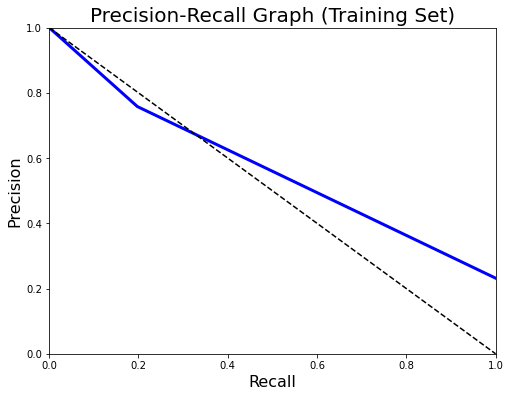

AUC = 0.589232


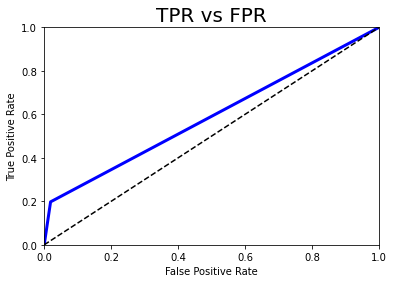

In [75]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=100000)
displayResult(model1, 0)

## Check Overall Score

In [76]:
overview

,Fit Time,Score Time,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.2571,0.0094,0.7992,0.7579,0.1975,0.5979
